### source: https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e

## Pandas

In [1]:
import pandas as pd
df = pd.read_csv('temporal.csv')
df.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [2]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
format_dict = {'data science': '${0:,.2f}', 'Mes': '{:%m-%Y}', 'machine learning': '{:.2%}'}

# We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])

# We apply the style to the visualization
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [6]:
format_dict = {'Mes': '{:%m-%Y}'} # Simplified format dictionary with values that do make sense for our data
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [7]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [8]:
df.head(10).style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [9]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


### Pandas Profiling

None of above treatments worked, so I skipped the Pandas Profiling.

### Matplotlib

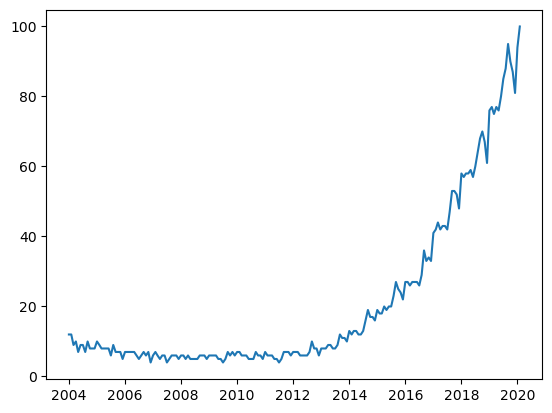

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['Mes'], df['data science'], label='data science') #The parameter label is to indicate the legend. This doesn't mean that it will be shown, we'll have to use another command that I'll explain later.

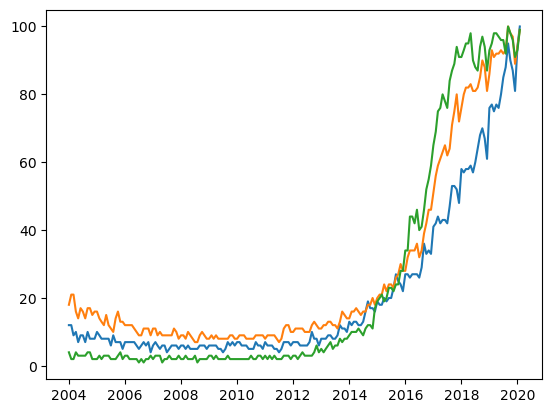

In [11]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

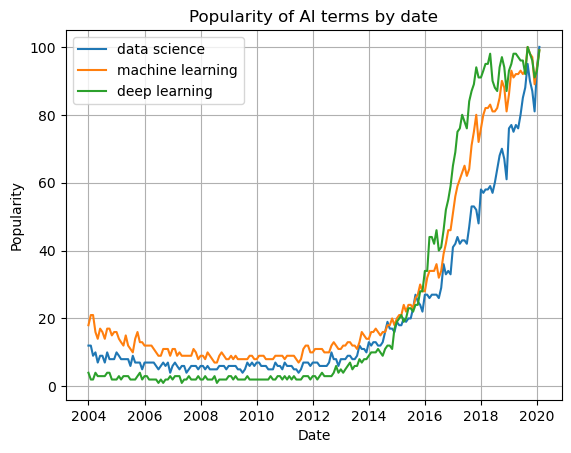

In [12]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

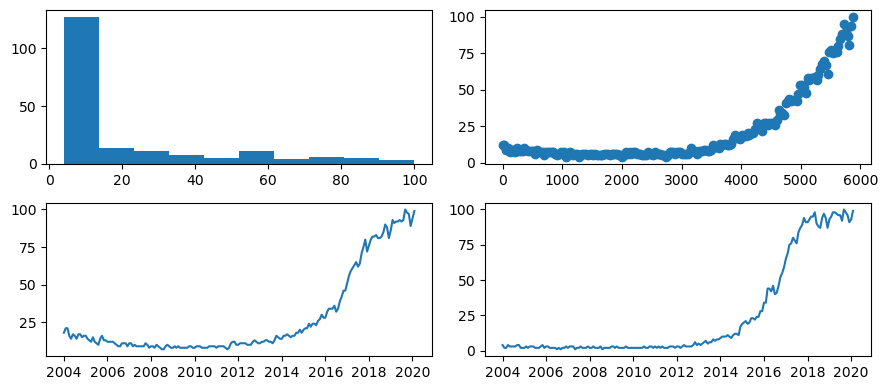

In [13]:
# Convert 'Mes' column to numerical values (days since a reference date)
df['Mes_numeric'] = (df['Mes'] - df['Mes'].min()).dt.days

fig, axes = plt.subplots(2, 2, figsize=(9, 4))

axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes_numeric'], df['data science'])  # Use 'Mes_numeric' as x-axis
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

# Remove the temporary 'Mes_numeric' column
df.drop(columns=['Mes_numeric'], inplace=True)

plt.tight_layout()
plt.show()

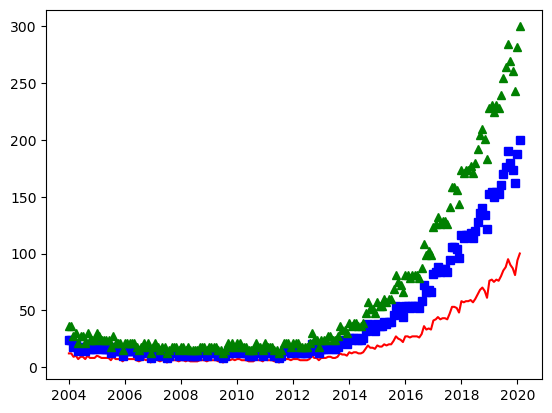

In [14]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science']*2, 'bs')
plt.plot(df['Mes'], df['data science']*3, 'g^')

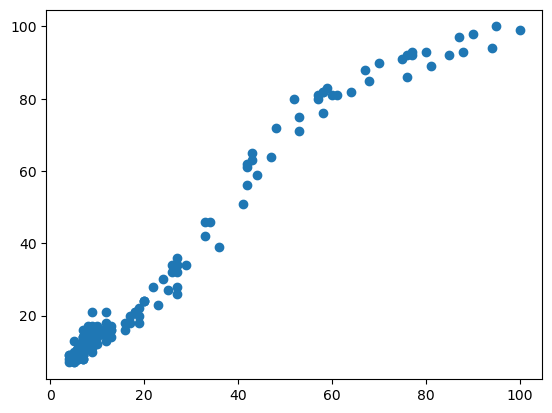

In [15]:
plt.scatter(df['data science'], df['machine learning'])

<BarContainer object of 194 artists>

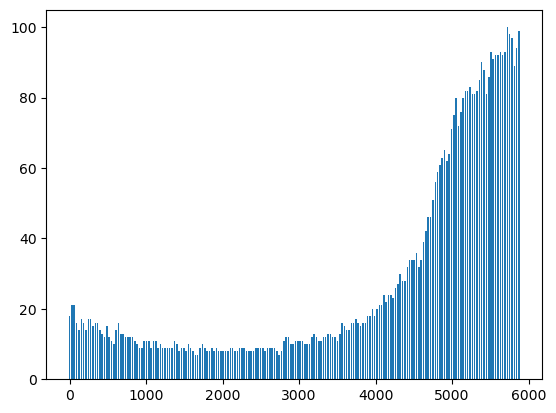

In [16]:
df['Mes_numeric'] = (df['Mes'] - df['Mes'].min()).dt.days
plt.bar(df['Mes_numeric'], df['machine learning'], width=20)

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

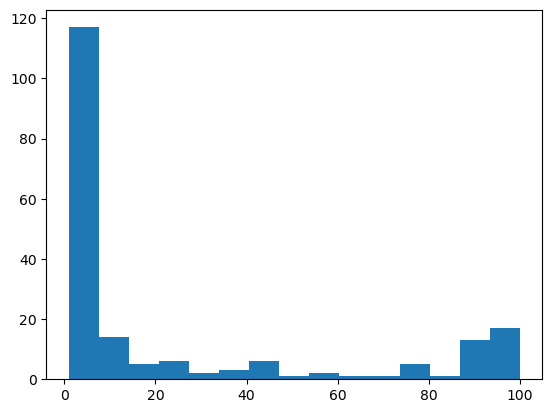

In [17]:
plt.hist(df['deep learning'], bins=15)

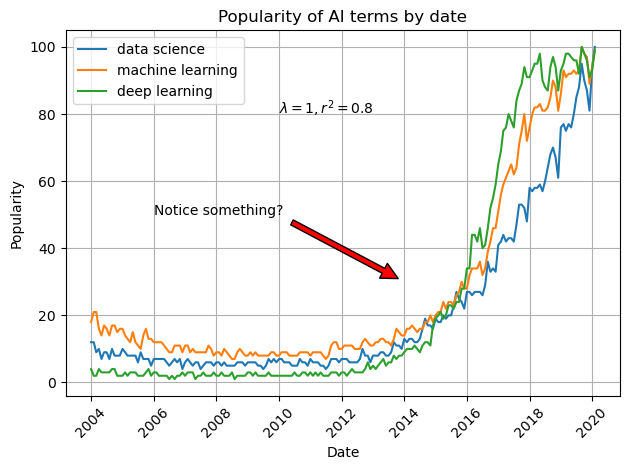

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.xticks(rotation=45)

plt.text(x=pd.to_datetime('2010-01-01'), y=80, s=r'$\lambda=1, r^2=0.8$') # Coordinates use the same units as the graph
plt.annotate('Notice something?', xy=(pd.to_datetime('2014-01-01'), 30), xytext=(pd.to_datetime('2006-01-01'), 50), arrowprops={'facecolor':'red', 'shrink':0.05})

plt.legend()
plt.tight_layout()
plt.show()

### Seaborn

<Axes: xlabel='Mes', ylabel='data science'>

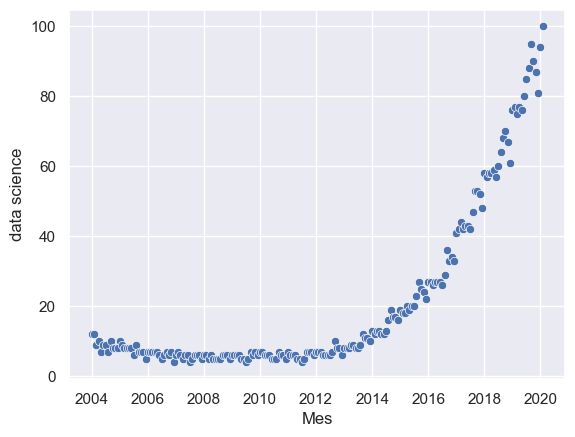

In [19]:
import seaborn as sns
sns.set()
sns.scatterplot(x=df['Mes'], y=df['data science'])

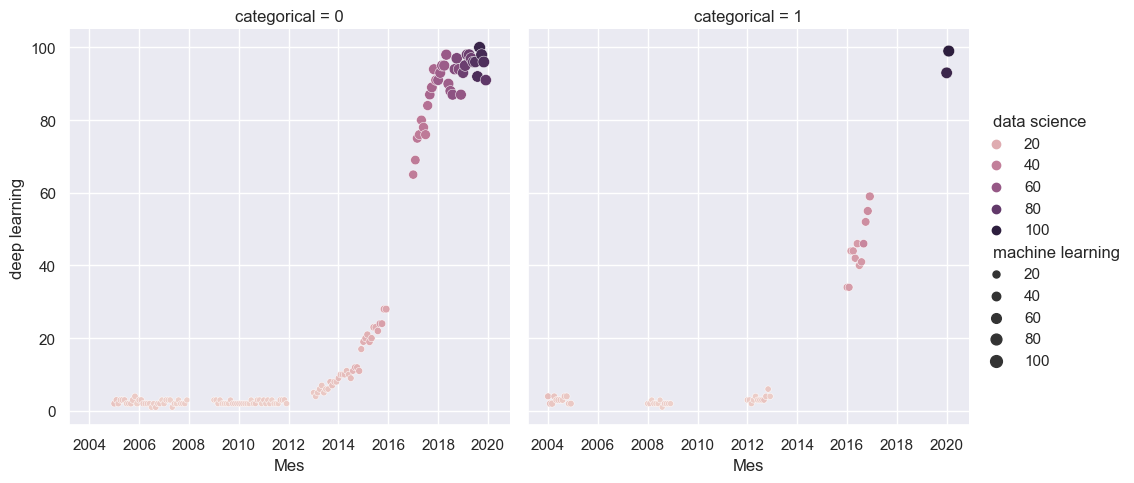

In [20]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning',
col='categorical', data=df)

/var/folders/3l/qm1h__810wxdvb5khb64r2dw0000gn/T/ipykernel_42904/2319445974.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

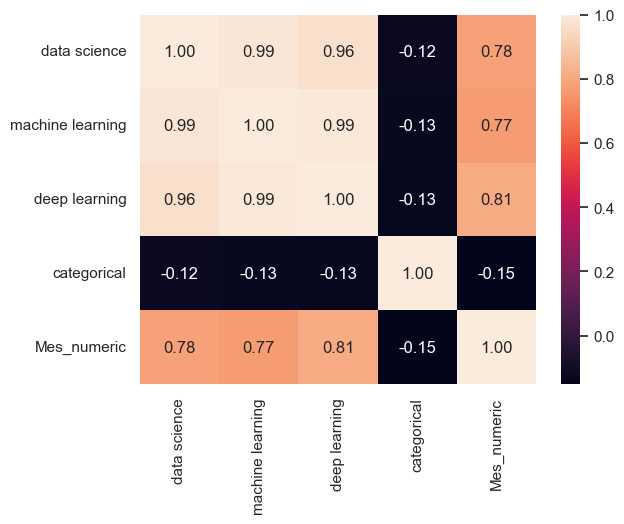

In [21]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

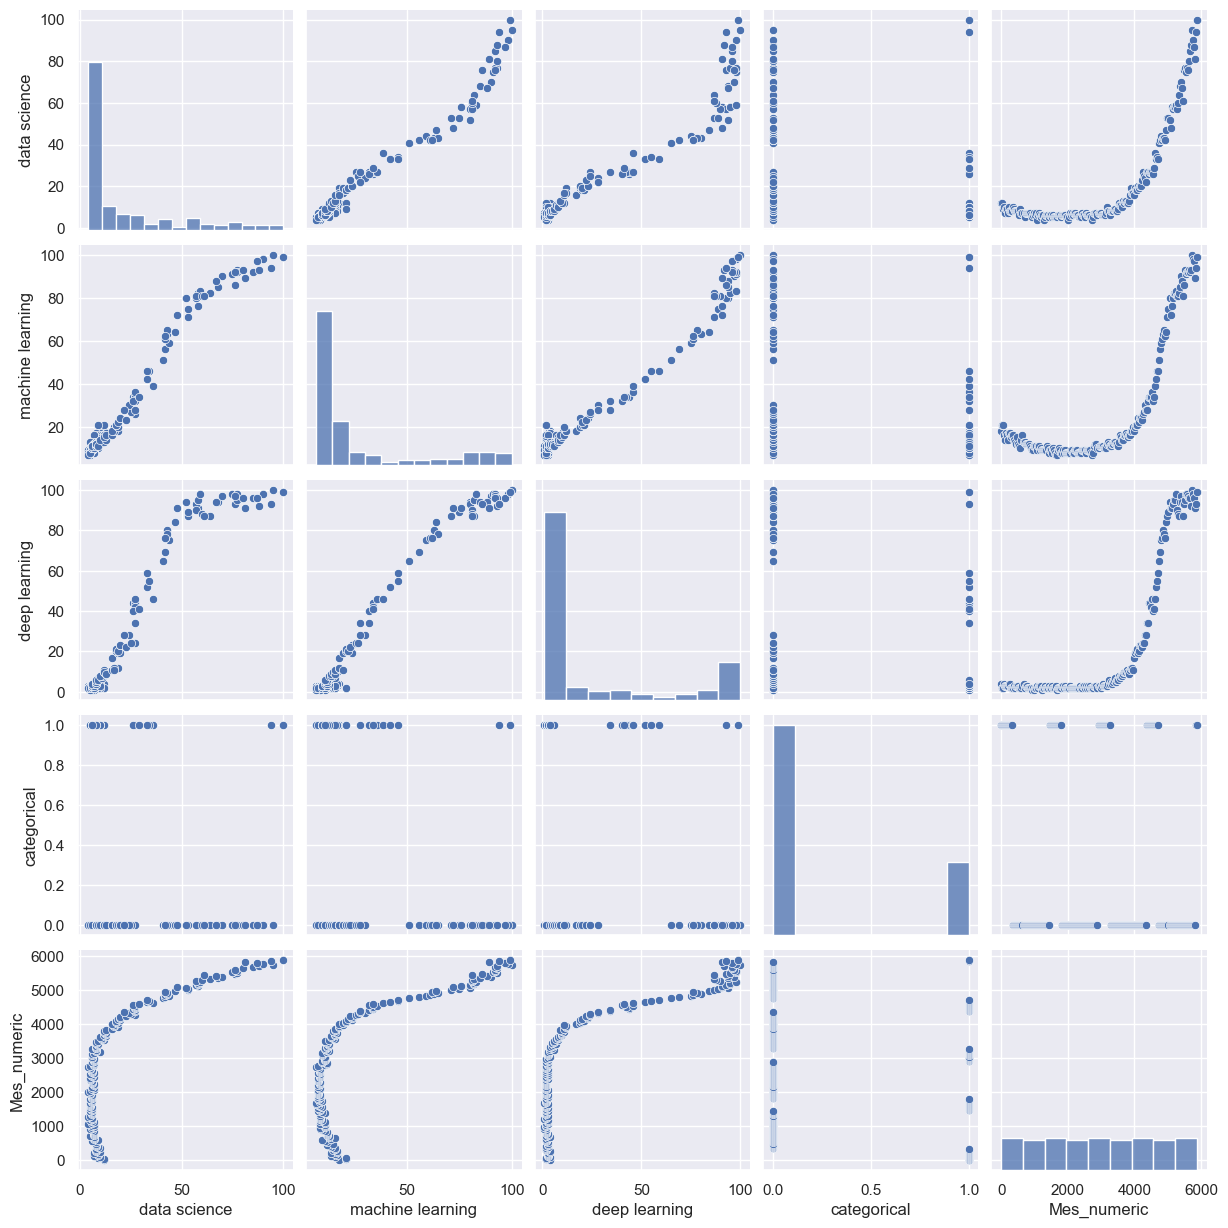

In [22]:
sns.pairplot(df)

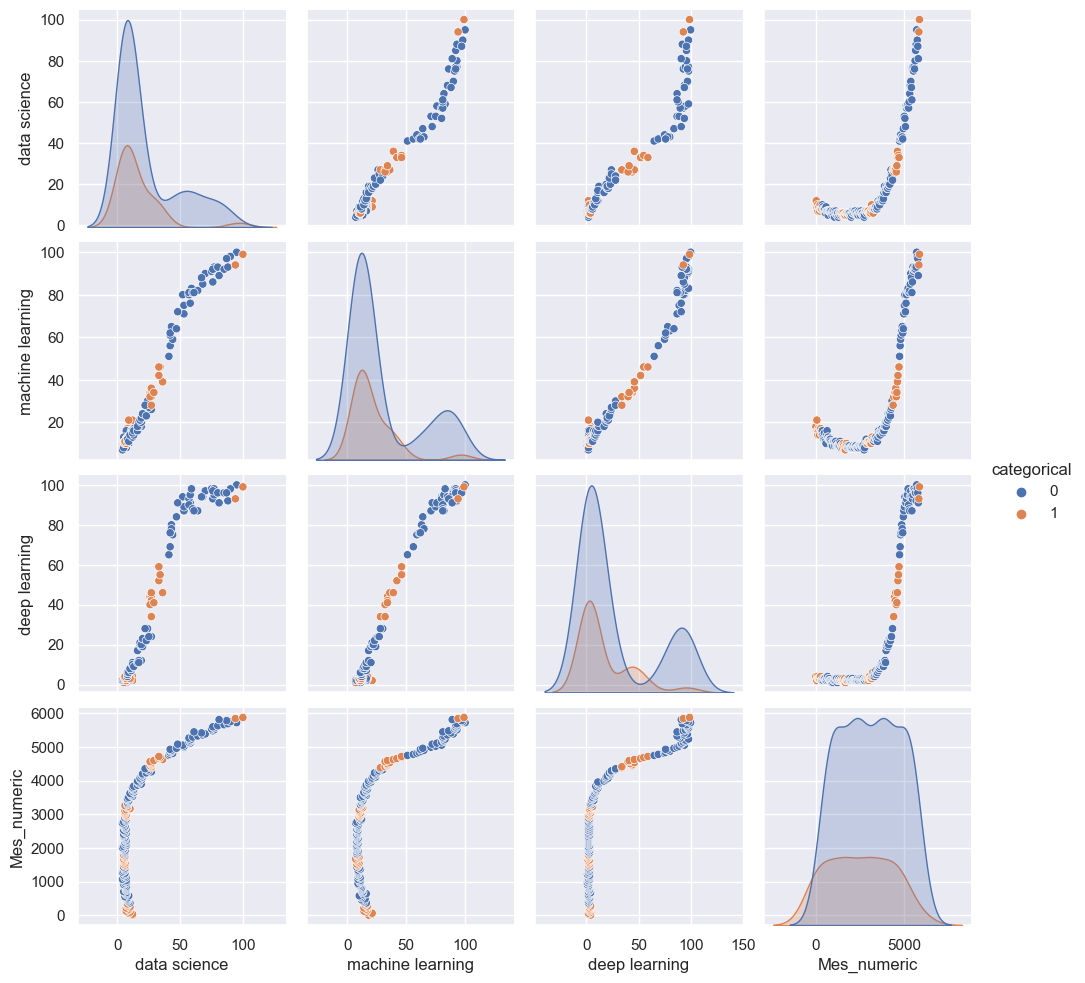

In [23]:
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

sns.pairplot(df, hue='categorical')

# Reset warning filters
warnings.resetwarnings()

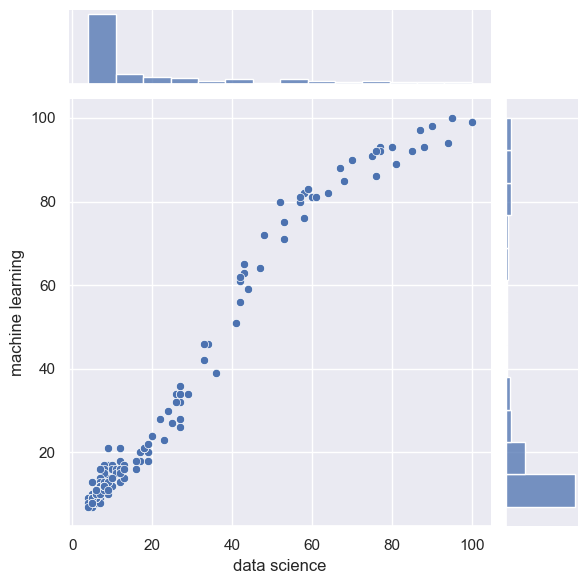

In [24]:
sns.jointplot(x='data science', y='machine learning', data=df)

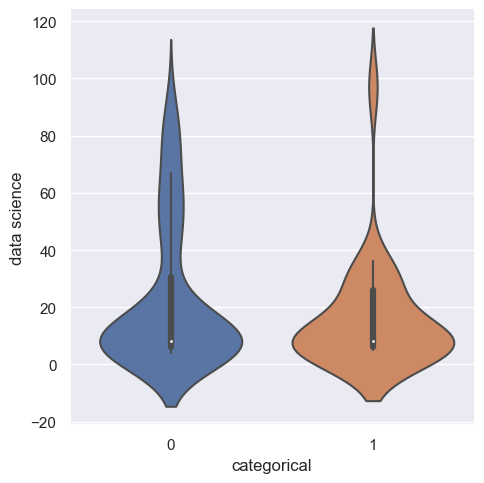

In [25]:
import seaborn as sns
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

sns.catplot(x='categorical', y='data science', kind='violin', data=df)

# Reset warning filters
warnings.resetwarnings()

Text(0.5, 1.0, 'Machine Learning')

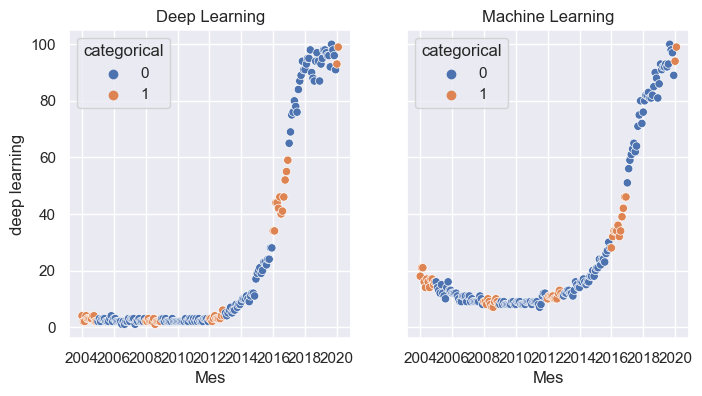

In [26]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')

### Bokeh

In [27]:
from bokeh.plotting import figure, output_file, save
output_file('data_science_popularity.html')

In [28]:
p = figure(title='data science', x_axis_label='Mes', y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend='popularity', line_width=2)
save(p)

'/Users/jomaicaalfiler/Desktop/data_science_popularity.html'

In [29]:
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot
import pandas as pd

# Sample DataFrame (replace with your actual data)
data = {'Mes': pd.date_range(start='2023-01-01', periods=10, freq='M'),
        'data science': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
        'machine learning': [15, 25, 35, 45, 55, 65, 75, 85, 95, 100],
        'deep learning': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
df = pd.DataFrame(data)

# Create output HTML file
output_file('multiple_graphs.html')

# Create individual figures
s1 = figure(width=250, height=250, title='data science')
s1.circle(df['Mes'], df['data science'], size=10, color='navy', alpha=0.5)

s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title='machine learning')
s2.triangle(df['Mes'], df['machine learning'], size=10, color='red', alpha=0.5)

s3 = figure(width=250, height=250, x_range=s1.x_range, title='deep learning')
s3.square(df['Mes'], df['deep learning'], size=5, color='green', alpha=0.5)

# Create a grid layout
p = gridplot([[s1, s2, s3]])

# Save the plot to the HTML file
show(p)

### Folium

In [30]:
# ########################################
import sys
!{sys.executable} -m pip install folium==0.12.1
# ########################################

import folium
m1 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


#### Map 1

In [31]:
import folium
m1 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')

#### Map 2

In [32]:
m2 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=16)
folium.Marker([41.38, 2.176], popup='<i>You can use whatever HTML code you want</i>',
tooltip='click here').add_to(m2)
folium.Marker([41.38, 2.174], popup='<b>You can use whatever HTML code you want</b>',
tooltip='dont click here').add_to(m2)
m2.save('map2.html')

In [50]:
# ########################################
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install geopy
# ########################################

from geopandas.tools import geocode

import geopy
geopy.geocoders.options.default_user_agent = "bigdata"

df2 = pd.read_csv('mapa.csv')
df2.dropna(axis=0, inplace=True)
df2['geometry'] = geocode(df2['País'], provider='nominatim')['geometry'] #It may take a while because it downloads a lot of data.
df2['Latitude'] = df2['geometry'].apply(lambda l: l.y)
df2['Longitude'] = df2['geometry'].apply(lambda l: l.x)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.1 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [56]:
from geopandas.tools import geocode
df2 = pd.read_csv('mapa.csv')
df2.dropna(axis=0, inplace=True)
df2['geometry'] = geocode(df2['País'], provider='nominatim')['geometry'] #It may take a while because it downloads a lot of data.
df2['Latitude'] = df2['geometry'].apply(lambda l: l.y)
df2['Longitude'] = df2['geometry'].apply(lambda l: l.x)

In [59]:
# Save the DataFrame to a new CSV file
df2.to_csv('geocoded_mapa.csv', index=False)  # index=False prevents writing row indices to the CSV

#### Map 3

In [58]:
import folium

m3 = folium.Map(location=[39.326234, -4.838065], tiles='openstreetmap', zoom_start=3)

def color_producer(val):
    if val <= 50:
        return 'red'
    else:
        return 'green'

for i in range(0, len(df2)):
    folium.Circle(
        location=[df2.iloc[i]['Latitude'], df2.iloc[i]['Longitude']],
        radius=5000 * df2.iloc[i]['data science'],
        color=color_producer(df2.iloc[i]['data science'])).add_to(m3)

m3.save('map3.html')